In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from IPython.display import display
import seaborn as sns
%reload_ext autoreload
%autoreload 2


## Filter data

In [32]:
def filter_data(data_sent , max_flux= -12):
    data = data_sent.copy()
    max_flux = -12
    min_flux = 26
    data = data[data['flux_aper']<max_flux]

    data = data[data['significance']>2]
    data_class = data[['class']]

    data_sig = data['significance']
    data_id = data['src_id']
    data_name = data['src_n']
    obs_info_params = [ 'livetime','likelihood','pileup_flag','mstr_sat_src_flag','mstr_streak_src_flag'   ,'gti_obs' , 'flux_significance_b'  , 'flux_significance_m' , 'flux_significance_s' , 'flux_significance_h' , 'flux_significance_u'    ]
    data_val = data.drop(columns=obs_info_params)
    return data_val

def norm_data(data_sent):
    data = data_sent.copy()
    #data.replace()
    for d in data:
        max_val = np.amax(data[d])
        min_val =  np.amin(data[d])
        data[d] = (data[d]-min_val)/(max_val-min_val)
    return data
def std_data(data_sent):
    data = data_sent.copy()
    for d in data:
        mean =  np.mean(data[d])
        std = np.sqrt(np.var(data[d]))
        data[d] = (data[d]-mean)/std 
    return data
def do_nothing(data_sent):
    return data_sent

In [33]:
def extract_data(data_sent , impute_fn = '',reduce_fn = ' ' , rf_impute=False):
    data = data_sent.copy()
    data = data.sample(frac=1)
    data = filter_data(data)
    #display(data)
    data_id = data[[ 'class' ,'src_n' , 'src_id' ,'significance' , ]]
    data_id = data_id
    #data_val = data.drop([ 'class' ,] , axis=1)
    data_val = reduce_fn(data)
    return data_val , data_id
    #if(rf_impute):
    #    data_val  , random_forest_imputer = impute_fn(data_val , data_id)
    #else:
    #    data_val = impute_fn(data_val)
    data_val = reduce_fn(data_val)
    data_val = data_val.reset_index(drop=True)
    data_reduced = pd.concat([data_id , data_val] , axis=1)
    if(rf_impute):
        return(data_reduced , random_forest_imputer)
    else:
        return data_reduced

## Load data

Here we will impute each class seperately ,
for testing we can pass given sample through each imputer and then combine the result

In [34]:
obj_class = 'PULSAR'

In [35]:

train = pd.read_csv('../processed_data/'+obj_class+'_.csv' , index_col='obs_id')
train = train.sample(frac=1)
train


,index,class,src_n,src_id,livetime,significance,likelihood,pileup_flag,mstr_sat_src_flag,mstr_streak_src_flag,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
obs_id,,,,,,,,,,,,,,,,,,,,,
PULSAR_OBS_363,363,PULSAR,PSR J1833-103,PL0099,7415.3,121.78,20080.290,False,False,False,...,0.000259,0.000347,1.505,12.6700,18.950,9.5030,216.30,229.00,204.30,1.214
PULSAR_OBS_92,92,PULSAR,PSR J0537-6910,PL0015,25642.1,519.42,867858.900,False,False,False,...,0.000702,0.000743,1.652,5.3370,5.763,4.9590,41.13,43.78,38.58,0.835
PULSAR_OBS_51,51,PULSAR,PSR J0418+5732,PL0011,68029.7,73.32,41651.570,False,False,False,...,0.000272,0.000960,1.209,0.5103,0.597,0.4368,63.17,75.29,52.66,1.289
PULSAR_OBS_337,337,PULSAR,PSR J1833-103,PL0099,7225.7,121.78,20080.290,False,False,False,...,0.000333,0.000434,1.063,15.5700,23.020,11.3100,212.80,223.80,201.10,0.834
PULSAR_OBS_19,19,PULSAR,PSR J0100-7211,PL0003,8037.7,65.51,39513.420,False,False,False,...,0.001636,0.002250,1.185,1.1370,1.332,0.9679,21.59,27.02,16.68,0.911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PULSAR_OBS_260,260,PULSAR,PSR J1745-2900,PL0081,28808.1,107.91,21810.190,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULSAR_OBS_382,382,PULSAR,PSR J1833-103,PL0099,9569.8,121.78,20080.290,False,False,False,...,0.000149,0.000196,0.910,32.5100,76.980,19.3000,186.20,198.60,174.30,0.715
PULSAR_OBS_243,243,PULSAR,PSR J1745-2900,PL0081,5060.4,107.91,21810.190,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### All data imputation at once

In [36]:

train = pd.read_csv('../processed_data/'+'BH'+'_.csv' , index_col='obs_id')
df_bh = train.sample(frac=1)


train = pd.read_csv('../processed_data/'+'NS'+'_.csv' , index_col='obs_id')
df_ns = train.sample(frac=1)

train = pd.read_csv('../processed_data/'+'CV'+'_.csv' , index_col='obs_id')
df_cv = train.sample(frac=1)

train = pd.read_csv('../processed_data/'+'PULSAR'+'_.csv' , index_col='obs_id')
df_plsr = train.sample(frac=1)

train = pd.read_csv('../processed_data/'+'TUC'+'_.csv' , index_col='obs_id')
df_tuc = train.sample(frac=1)
src = pd.read_csv('../source_list/TUC_data_clean_source_list.csv')
display(src.head())
tuc_class = ['CV           ','MSP          ', 'QLX          ']
src_list = src[src['A_SOURCE_TYPE'].isin(tuc_class)]['SRC_ID']
df_tuc = df_tuc[df_tuc['src_id'].isin(src_list)]

train = pd.concat([df_bh , df_ns , df_cv, df_plsr , df_tuc])
train

,SRC_ID,A_NAME,A_NAME_ALT\n,A_RA,A_DEC,A_SOURCE_TYPE,A_SOURCE_TYPE_FLAG,B_NAME,B_RA,B_DEC,XOFFSET_
0,TC0001,CXOGLB J002353.9-720350,[GHE2001] W125,5.974829,-72.063922,QLX,?,2CXO J002353.9-720350,5.974992,-72.063947,0.003
1,TC0002,CXOGLB J002400.9-720453,[GHE2001] W58,6.003946,-72.081444,QLX,,2CXO J002400.9-720453,6.004075,-72.081474,0.003
2,TC0003,CXOGLB J002403.4-720451,[GHE2001] W46,6.014558,-72.081094,QLX,,2CXO J002403.5-720452,6.014684,-72.081116,0.003
3,TC0004,CXOGLB J002404.9-720451,[GHE2001] W37,6.020679,-72.080925,QLX,?,2CXO J002404.9-720451,6.020771,-72.080953,0.002
4,TC0005,CXOGLB J002408.3-720431,[GHE2001] W17,6.034604,-72.075397,QLX,?,2CXO J002408.3-720431,6.034720,-72.075417,0.002


,index,class,src_n,src_id,livetime,significance,likelihood,pileup_flag,mstr_sat_src_flag,mstr_streak_src_flag,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
obs_id,,,,,,,,,,,,,,,,,,,,,
BH_OBS_191,191,BH,SAXWFC J1819.4-2524.,BH0030,9209.3,2.24,11.55864,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BH_OBS_42,42,BH,CXOU J100506.7-07443,BH0014,75682.2,11.41,1457.84500,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BH_OBS_140,140,BH,J1745-2900,BH0027,48532.8,337.00,462011.40000,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BH_OBS_60,60,BH,CXOU J100510.9-07453,BH0017,46277.9,4.58,82.89468,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BH_OBS_89,89,BH,CXOU J100516.2-07423,BH0020,160215.7,16.78,1251.49900,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TUC_OBS_584,584,TUC,CXOGLB J002410.0-720441,TC0055,68771.4,8.28,278.65800,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TUC_OBS_87,87,TUC,CXOGLB J002403.9-720442,TC0010,5307.0,11.17,447.70410,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TUC_OBS_158,158,TUC,CXOGLB J002406.0-720501,TC0017,4691.1,7.63,313.90160,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
for a, b in zip(df_tuc['src_n'] , df_cv['src_n']):
    if(a[:-1]==b[:-1]):
        print(a , b)

### Select only TUC sources for which classification is given

In [38]:
train['class'].value_counts()

CV        786
TUC       656
PULSAR    445
NS        440
BH        199
Name: class, dtype: int64

# Combine observations

# RF imputer Missingpy

In [39]:
import sklearn.neighbors._base
from os import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [40]:
from missingpy import MissForest 

In [41]:
def rf_impute(d):
    #data = pd.concat([i , d] , axis=1)
    #data = data.drop(columns=['src_n' , 'src_id' , 'significance' ,])
    rf_imputer = MissForest()
    #new_data = d.drop(columns= ['class'])
    new_data = rf_imputer.fit_transform(d)
    return new_data , rf_imputer

# Choose Features

In [42]:
from features import features as feat 
all_feat = list(feat['info'])+list(feat['flux']['photon'])+list(feat['flux']['energy'])+list(feat['variability'])+list(feat['hardness'])+list(feat['model_fit']['powerlaw'])+list(feat['model_fit']['bb'])+list(feat['model_fit']['brems'])+list(feat['info_pre_filter'])

In [43]:
feat_to_drop = list(feat['model_fit']['powerlaw']) + list(feat['model_fit']['bb']) + list(feat['model_fit']['brems']) 
feat_to_drop = []
feat_used = [item for item in all_feat if item not in feat_to_drop]

In [44]:
train[feat_used]

,class,src_n,significance,src_id,photflux_aper_lolim_s,photflux_aper_hilim_u,photflux_aper_s,photflux_aper_hilim_m,photflux_aper_hilim_s,photflux_aper_hilim_b,...,flux_significance_h,livetime,flux_significance_b,flux_significance_m,likelihood,mstr_sat_src_flag,gti_obs,flux_significance_s,flux_significance_u,mstr_streak_src_flag
obs_id,,,,,,,,,,,,,,,,,,,,,
BH_OBS_191,BH,SAXWFC J1819.4-2524.,2.24,BH0030,NaN,-5.443336,NaN,-6.675512,-6.578725,-6.453704,...,0.00,9209.3,0.00,0.00,11.55864,False,2004-07-17T11:09:06,0.00,0.00,False
BH_OBS_42,BH,CXOU J100506.7-07443,11.41,BH0014,NaN,-6.330125,NaN,-7.568315,-7.377061,-7.277613,...,0.00,75682.2,0.00,0.00,1457.84500,False,2010-01-29T14:46:35,0.00,0.00,False
BH_OBS_140,BH,J1745-2900,337.00,BH0027,NaN,-5.420331,NaN,-6.892451,-7.055912,-5.294478,...,4.33,48532.8,4.51,1.05,462011.40000,False,2005-07-24T20:13:41,0.00,0.00,False
BH_OBS_60,BH,CXOU J100510.9-07453,4.58,BH0017,NaN,-5.181444,NaN,-7.267365,-6.969805,-6.721933,...,0.00,46277.9,0.00,0.00,82.89468,False,2012-04-05T19:03:53,0.00,0.00,False
BH_OBS_89,BH,CXOU J100516.2-07423,16.78,BH0020,-6.334888,-6.114526,-6.237997,-6.455188,-6.162854,-5.826814,...,2.89,160215.7,7.31,4.46,1251.49900,False,2012-01-21T08:54:47,5.14,1.10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TUC_OBS_584,TUC,CXOGLB J002410.0-720441,8.28,TC0055,-6.471726,-6.309361,-6.327071,-6.887060,-6.218747,-5.919013,...,1.89,68771.4,4.13,1.50,278.65800,False,2002-10-11T01:59:30,3.53,1.14,False
TUC_OBS_87,TUC,CXOGLB J002403.9-720442,11.17,TC0010,-6.773916,-5.069458,-6.014304,NaN,-5.763211,-5.639785,...,NaN,5307.0,1.17,NaN,447.70410,False,2002-09-30T11:50:19,1.24,1.54,False
TUC_OBS_158,TUC,CXOGLB J002406.0-720501,7.63,TC0017,NaN,-4.984640,NaN,-6.331521,-5.906929,-5.689307,...,0.00,4691.1,1.06,0.00,313.90160,False,2000-03-17T04:09:04,0.00,0.00,False


In [45]:
sp = [] 
for f in feat_used:
    #print(f)
    na = train[feat_used][f].isna().value_counts()
    try:
        sp.append([f , 1-na[0]/(na[0]+na[1])])
    except:
        sp.append([f , 0])
sp =  np.asarray(sp)
sparsity = pd.DataFrame(sp , columns=['feat' , 'sparsity']).sort_values(by='sparsity' , ascending=False)


In [46]:
sparsity[:20]

,feat,sparsity
77,bb_nh_lolim,0.8954869358669834
92,brems_nh_lolim,0.7961203483768804
68,powlaw_nh_lolim,0.7854315122723674
87,brems_kt_hilim,0.772763262074426
60,powlaw_ampl_hilim,0.7482185273159145
78,bb_ampl_hilim,0.7458432304038005
91,brems_nh_hilim,0.7454473475851149
76,bb_nh_hilim,0.7454473475851149
73,bb_ampl,0.7450514647664291
66,flux_powlaw,0.7450514647664291


## Extract data

In [47]:
train_set = train[feat_used]

In [48]:
data_val , data_id   = extract_data(train_set ,  impute_fn= rf_impute , reduce_fn= do_nothing , rf_impute=True )
data_val.sort_index()
df = data_val.copy()
df 

,class,src_n,significance,src_id,photflux_aper_lolim_s,photflux_aper_hilim_u,photflux_aper_s,photflux_aper_hilim_m,photflux_aper_hilim_s,photflux_aper_hilim_b,...,bb_ampl_lolim,bb_kt_lolim,flux_bb,brems_kt,brems_kt_hilim,brems_nh,brems_kt_lolim,brems_stat,brems_nh_hilim,brems_nh_lolim
obs_id,,,,,,,,,,,,,,,,,,,,,
NS_OBS_310,NS,XMMU J004245.2+41172,4.71,NS0046,NaN,NaN,NaN,NaN,NaN,-6.730487,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_OBS_63,CV,[HPH2013] 108,14.30,CV0005,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULSAR_OBS_226,PULSAR,PSR J1745-2900,107.91,PL0081,NaN,-5.923360,NaN,-6.484126,-7.353694,-4.651695,...,0.000009,1.0500,-13.002570,4.540,6.315,763.400000,3.4690,1.175,842.90,694.40
PULSAR_OBS_392,PULSAR,PSR J1856+0113,15.97,PL0108,-5.757459,-5.342562,-5.597051,-5.182831,-5.480303,-4.526659,...,0.000005,0.8935,-13.209082,9.332,25.160,61.070000,5.4630,1.020,79.57,46.12
PULSAR_OBS_274,PULSAR,PSR J1745-2900,107.91,PL0081,NaN,-5.791827,NaN,-6.430509,-7.046675,-4.679438,...,0.000029,0.8727,-12.826231,2.575,3.476,974.600000,2.0060,1.374,1125.00,848.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NS_OBS_203,NS,XMMU J004245.2+41172,49.26,NS0044,-4.705534,-3.893129,-4.557991,-5.180061,-4.447940,-4.223371,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULSAR_OBS_182,PULSAR,PSR J1622-4950,14.97,PL0063,NaN,-5.543938,NaN,-5.318759,-6.227238,-4.356153,...,0.000107,0.6524,-12.747632,1.620,2.003,513.900000,1.3410,0.785,587.30,449.20
CV_OBS_293,CV,[HPH2013] 50,9.94,CV0037,NaN,-3.886725,NaN,-6.156020,-5.755475,-5.414539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
info_col = ['class' , 'src_n' , 'src_id' , 'significance']

In [50]:
s_ids = df['src_id'].unique()
df_comb = pd.DataFrame()
for s in s_ids[:]:
    temp = df[df['src_id']==s]
    temp_val = temp.drop(columns=info_col)
    #display(temp_val)
    temp_id = temp[info_col].iloc[:1].reset_index()
    temp_mean =  temp_val.mean().to_frame().T.reset_index(drop=True)
    #display(temp_id , temp_mean)
    temp = pd.concat([temp_id , temp_mean] , axis = 1)
    temp = temp.set_index('obs_id')
    df_comb = df_comb.append(temp)
    #display(temp)
#display(df_comb)
df = df_comb.copy()

In [51]:
df_comb

,class,src_n,src_id,significance,photflux_aper_lolim_s,photflux_aper_hilim_u,photflux_aper_s,photflux_aper_hilim_m,photflux_aper_hilim_s,photflux_aper_hilim_b,...,bb_ampl_lolim,bb_kt_lolim,flux_bb,brems_kt,brems_kt_hilim,brems_nh,brems_kt_lolim,brems_stat,brems_nh_hilim,brems_nh_lolim
obs_id,,,,,,,,,,,,,,,,,,,,,
NS_OBS_310,NS,XMMU J004245.2+41172,NS0046,4.71,-6.325782,-4.201156,-5.639923,-6.161552,-5.953618,-5.703715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_OBS_63,CV,[HPH2013] 108,CV0005,14.30,-6.073797,-4.055960,-5.433362,-6.056950,-5.616809,-5.749229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULSAR_OBS_226,PULSAR,PSR J1745-2900,PL0081,107.91,-7.228734,-5.126539,-6.534383,-6.324040,-6.445290,-4.595549,...,0.000037,1.005476,-12.814547,8.490034,38.869429,898.944828,3.758379,1.005276,1059.765517,763.213793
PULSAR_OBS_392,PULSAR,PSR J1856+0113,PL0108,15.97,-5.880902,-5.985412,-5.755242,-5.362494,-5.658549,-4.779026,...,0.000007,0.766750,-13.408632,6.176000,14.661500,62.030000,3.871000,1.051000,77.460000,49.275000
TUC_OBS_575,TUC,CXOGLB J002409.2-720543,TC0054,6.10,-6.805809,-5.827142,-6.199048,-6.422955,-5.995973,-5.631028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PULSAR_OBS_200,PULSAR,PSR J1702-4128,PL0070,2.61,NaN,-5.811916,NaN,-5.968592,-6.638272,-5.453087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULSAR_OBS_406,PULSAR,PSR J1958+284,PL0116,3.09,-5.411616,NaN,-5.110586,-5.130475,-4.942334,-4.685080,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULSAR_OBS_172,PULSAR,PSR J1531-5610,PL0059,3.31,NaN,-4.710188,NaN,-5.655804,-6.362911,-5.144844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
data_mean_val = df_comb.drop(columns=info_col)
display(data_mean_val)
data_mean_id = df_comb[info_col]
data_mean_id['class'].value_counts()

,photflux_aper_lolim_s,photflux_aper_hilim_u,photflux_aper_s,photflux_aper_hilim_m,photflux_aper_hilim_s,photflux_aper_hilim_b,photflux_aper_lolim_u,photflux_aper_lolim_h,photflux_aper_b,photflux_aper_u,...,bb_ampl_lolim,bb_kt_lolim,flux_bb,brems_kt,brems_kt_hilim,brems_nh,brems_kt_lolim,brems_stat,brems_nh_hilim,brems_nh_lolim
obs_id,,,,,,,,,,,,,,,,,,,,,
NS_OBS_310,-6.325782,-4.201156,-5.639923,-6.161552,-5.953618,-5.703715,NaN,-6.825504,-5.935784,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_OBS_63,-6.073797,-4.055960,-5.433362,-6.056950,-5.616809,-5.749229,-4.896891,-7.119625,-6.017975,-4.251635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULSAR_OBS_226,-7.228734,-5.126539,-6.534383,-6.324040,-6.445290,-4.595549,-6.240518,-4.852489,-4.649991,-5.477323,...,0.000037,1.005476,-12.814547,8.490034,38.869429,898.944828,3.758379,1.005276,1059.765517,763.213793
PULSAR_OBS_392,-5.880902,-5.985412,-5.755242,-5.362494,-5.658549,-4.779026,-6.944622,-5.336519,-4.816652,-5.622512,...,0.000007,0.766750,-13.408632,6.176000,14.661500,62.030000,3.871000,1.051000,77.460000,49.275000
TUC_OBS_575,-6.805809,-5.827142,-6.199048,-6.422955,-5.995973,-5.631028,-7.003771,-7.023420,-5.797816,-6.411751,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PULSAR_OBS_200,NaN,-5.811916,NaN,-5.968592,-6.638272,-5.453087,NaN,-6.258927,-5.593971,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULSAR_OBS_406,-5.411616,NaN,-5.110586,-5.130475,-4.942334,-4.685080,NaN,NaN,-4.804100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULSAR_OBS_172,NaN,-4.710188,NaN,-5.655804,-6.362911,-5.144844,NaN,-5.934794,-5.256490,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


PULSAR    118
CV         65
TUC        59
NS         48
BH         27
Name: class, dtype: int64

In [54]:
new_data , random_forest_imputer = rf_impute(data_mean_val)
#train_data.index.name = 'index'
#display(train_data.describe())
#train_data.to_csv('../processed_data/train_norm_rf_impute')

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6


In [55]:
data_mean_val

,photflux_aper_lolim_s,photflux_aper_hilim_u,photflux_aper_s,photflux_aper_hilim_m,photflux_aper_hilim_s,photflux_aper_hilim_b,photflux_aper_lolim_u,photflux_aper_lolim_h,photflux_aper_b,photflux_aper_u,...,bb_ampl_lolim,bb_kt_lolim,flux_bb,brems_kt,brems_kt_hilim,brems_nh,brems_kt_lolim,brems_stat,brems_nh_hilim,brems_nh_lolim
obs_id,,,,,,,,,,,,,,,,,,,,,
NS_OBS_310,-6.325782,-4.201156,-5.639923,-6.161552,-5.953618,-5.703715,NaN,-6.825504,-5.935784,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_OBS_63,-6.073797,-4.055960,-5.433362,-6.056950,-5.616809,-5.749229,-4.896891,-7.119625,-6.017975,-4.251635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULSAR_OBS_226,-7.228734,-5.126539,-6.534383,-6.324040,-6.445290,-4.595549,-6.240518,-4.852489,-4.649991,-5.477323,...,0.000037,1.005476,-12.814547,8.490034,38.869429,898.944828,3.758379,1.005276,1059.765517,763.213793
PULSAR_OBS_392,-5.880902,-5.985412,-5.755242,-5.362494,-5.658549,-4.779026,-6.944622,-5.336519,-4.816652,-5.622512,...,0.000007,0.766750,-13.408632,6.176000,14.661500,62.030000,3.871000,1.051000,77.460000,49.275000
TUC_OBS_575,-6.805809,-5.827142,-6.199048,-6.422955,-5.995973,-5.631028,-7.003771,-7.023420,-5.797816,-6.411751,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PULSAR_OBS_200,NaN,-5.811916,NaN,-5.968592,-6.638272,-5.453087,NaN,-6.258927,-5.593971,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULSAR_OBS_406,-5.411616,NaN,-5.110586,-5.130475,-4.942334,-4.685080,NaN,NaN,-4.804100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PULSAR_OBS_172,NaN,-4.710188,NaN,-5.655804,-6.362911,-5.144844,NaN,-5.934794,-5.256490,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
imp_data =  pd.DataFrame(new_data , columns = data_mean_val.columns.to_list()  , index=data_mean_val.index.to_list())
imp_data.index.name = 'src_id'
normalized_df=(imp_data-imp_data.mean())/imp_data.std()
display(imp_data)
#normalized_df.describe()

,photflux_aper_lolim_s,photflux_aper_hilim_u,photflux_aper_s,photflux_aper_hilim_m,photflux_aper_hilim_s,photflux_aper_hilim_b,photflux_aper_lolim_u,photflux_aper_lolim_h,photflux_aper_b,photflux_aper_u,...,bb_ampl_lolim,bb_kt_lolim,flux_bb,brems_kt,brems_kt_hilim,brems_nh,brems_kt_lolim,brems_stat,brems_nh_hilim,brems_nh_lolim
src_id,,,,,,,,,,,,,,,,,,,,,
NS_OBS_310,-6.325782,-4.201156,-5.639923,-6.161552,-5.953618,-5.703715,-5.171171,-6.825504,-5.935784,-4.498603,...,0.014550,1.540436,-13.206603,9.483366,57.198615,204.459500,5.143853,2.657775,233.782367,192.562683
CV_OBS_63,-6.073797,-4.055960,-5.433362,-6.056950,-5.616809,-5.749229,-4.896891,-7.119625,-6.017975,-4.251635,...,0.002338,1.582689,-13.154816,9.329865,56.574743,135.073950,5.135703,2.526807,150.030267,114.358000
PULSAR_OBS_226,-7.228734,-5.126539,-6.534383,-6.324040,-6.445290,-4.595549,-6.240518,-4.852489,-4.649991,-5.477323,...,0.000037,1.005476,-12.814547,8.490034,38.869429,898.944828,3.758379,1.005276,1059.765517,763.213793
PULSAR_OBS_392,-5.880902,-5.985412,-5.755242,-5.362494,-5.658549,-4.779026,-6.944622,-5.336519,-4.816652,-5.622512,...,0.000007,0.766750,-13.408632,6.176000,14.661500,62.030000,3.871000,1.051000,77.460000,49.275000
TUC_OBS_575,-6.805809,-5.827142,-6.199048,-6.422955,-5.995973,-5.631028,-7.003771,-7.023420,-5.797816,-6.411751,...,0.013956,1.582451,-13.168648,9.993160,184.377162,196.291850,4.960845,1.582373,235.576867,186.377817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PULSAR_OBS_200,-7.507397,-5.811916,-6.850443,-5.968592,-6.638272,-5.453087,-6.498886,-6.258927,-5.593971,-5.926166,...,0.003113,1.506106,-13.202569,9.765398,63.924798,558.524147,4.936584,1.567037,525.914144,467.340776
PULSAR_OBS_406,-5.411616,-4.892348,-5.110586,-5.130475,-4.942334,-4.685080,-5.255199,-6.418765,-4.804100,-5.019571,...,0.012840,1.532704,-13.128063,8.181962,54.204126,126.746233,4.528191,1.226463,143.517733,115.378267
PULSAR_OBS_172,-7.243783,-4.710188,-6.570750,-5.655804,-6.362911,-5.144844,-5.245135,-5.934794,-5.256490,-4.869801,...,0.002433,1.476630,-13.180420,9.460549,58.659003,406.508543,5.119092,1.041901,433.838667,367.889083


In [57]:
data_mean_id 

,class,src_n,src_id,significance
obs_id,,,,
NS_OBS_310,NS,XMMU J004245.2+41172,NS0046,4.71
CV_OBS_63,CV,[HPH2013] 108,CV0005,14.30
PULSAR_OBS_226,PULSAR,PSR J1745-2900,PL0081,107.91
PULSAR_OBS_392,PULSAR,PSR J1856+0113,PL0108,15.97
TUC_OBS_575,TUC,CXOGLB J002409.2-720543,TC0054,6.10
...,...,...,...,...
PULSAR_OBS_200,PULSAR,PSR J1702-4128,PL0070,2.61
PULSAR_OBS_406,PULSAR,PSR J1958+284,PL0116,3.09
PULSAR_OBS_172,PULSAR,PSR J1531-5610,PL0059,3.31


In [59]:
processed_data_all = pd.concat([data_mean_id , normalized_df] , axis=1)
processed_data_all.index.name = 'obs_id'
processed_data_all.to_csv('../processed_data/v5_obs_combined/'+'all_once'+'_rf_impute.csv')
processed_data_all = pd.concat([data_mean_id , imp_data] , axis=1)
processed_data_all.index.name = 'obs_id'
processed_data_all.to_csv('../processed_data/v5_obs_combined/'+'all_once'+'_rf_impute_no_norm.csv')
display(processed_data_all)

,class,src_n,src_id,significance,photflux_aper_lolim_s,photflux_aper_hilim_u,photflux_aper_s,photflux_aper_hilim_m,photflux_aper_hilim_s,photflux_aper_hilim_b,...,bb_ampl_lolim,bb_kt_lolim,flux_bb,brems_kt,brems_kt_hilim,brems_nh,brems_kt_lolim,brems_stat,brems_nh_hilim,brems_nh_lolim
obs_id,,,,,,,,,,,,,,,,,,,,,
NS_OBS_310,NS,XMMU J004245.2+41172,NS0046,4.71,-6.325782,-4.201156,-5.639923,-6.161552,-5.953618,-5.703715,...,0.014550,1.540436,-13.206603,9.483366,57.198615,204.459500,5.143853,2.657775,233.782367,192.562683
CV_OBS_63,CV,[HPH2013] 108,CV0005,14.30,-6.073797,-4.055960,-5.433362,-6.056950,-5.616809,-5.749229,...,0.002338,1.582689,-13.154816,9.329865,56.574743,135.073950,5.135703,2.526807,150.030267,114.358000
PULSAR_OBS_226,PULSAR,PSR J1745-2900,PL0081,107.91,-7.228734,-5.126539,-6.534383,-6.324040,-6.445290,-4.595549,...,0.000037,1.005476,-12.814547,8.490034,38.869429,898.944828,3.758379,1.005276,1059.765517,763.213793
PULSAR_OBS_392,PULSAR,PSR J1856+0113,PL0108,15.97,-5.880902,-5.985412,-5.755242,-5.362494,-5.658549,-4.779026,...,0.000007,0.766750,-13.408632,6.176000,14.661500,62.030000,3.871000,1.051000,77.460000,49.275000
TUC_OBS_575,TUC,CXOGLB J002409.2-720543,TC0054,6.10,-6.805809,-5.827142,-6.199048,-6.422955,-5.995973,-5.631028,...,0.013956,1.582451,-13.168648,9.993160,184.377162,196.291850,4.960845,1.582373,235.576867,186.377817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PULSAR_OBS_200,PULSAR,PSR J1702-4128,PL0070,2.61,-7.507397,-5.811916,-6.850443,-5.968592,-6.638272,-5.453087,...,0.003113,1.506106,-13.202569,9.765398,63.924798,558.524147,4.936584,1.567037,525.914144,467.340776
PULSAR_OBS_406,PULSAR,PSR J1958+284,PL0116,3.09,-5.411616,-4.892348,-5.110586,-5.130475,-4.942334,-4.685080,...,0.012840,1.532704,-13.128063,8.181962,54.204126,126.746233,4.528191,1.226463,143.517733,115.378267
PULSAR_OBS_172,PULSAR,PSR J1531-5610,PL0059,3.31,-7.243783,-4.710188,-6.570750,-5.655804,-6.362911,-5.144844,...,0.002433,1.476630,-13.180420,9.460549,58.659003,406.508543,5.119092,1.041901,433.838667,367.889083


In [93]:
sparsity['feat'][0]

'class'

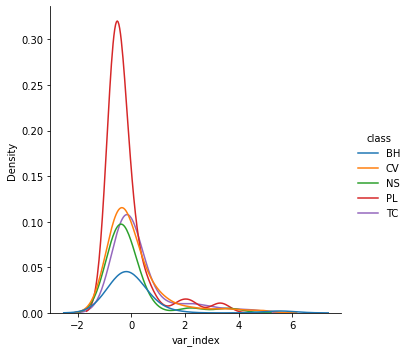

In [112]:
sns.displot(
    data =  processed_data_all , 
    x = 'var_index' , 
    kind = 'kde' , 
    hue = 'class'
)

plt.show()

In [109]:
processed_data_all

,class,significance,photflux_aper_hilim_u,photflux_aper_hilim_b,photflux_aper_lolim_h,photflux_aper_m,photflux_aper_hilim_m,photflux_aper_hilim_s,photflux_aper_lolim_m,photflux_aper_lolim_b,...,bb_ampl,bb_ampl_lolim,bb_kt_hilim,brems_kt_lolim,brems_kt,brems_kt_hilim,brems_nh_lolim,brems_stat,brems_nh_hilim,brems_nh
src_id,,,,,,,,,,,,,,,,,,,,,
BH0001,BH,-0.092963,-0.321141,0.442908,0.515656,0.589796,0.549171,0.609565,0.695685,0.549074,...,-0.502055,-0.515330,-0.535712,-0.398119,-0.492976,-0.378602,-0.770061,-0.871349,-0.726233,-0.743487
BH0003,BH,-0.143817,-0.221056,0.454411,0.766986,0.732369,0.705112,0.069116,0.804934,0.545875,...,-0.505944,-0.520658,-0.494571,-0.383140,-0.469388,-0.376393,-0.586944,-0.072503,-0.545159,-0.557504
BH0004,BH,-0.272880,-1.341423,0.114878,0.581779,0.308017,0.280342,-0.635451,0.437881,0.242793,...,-0.505085,-0.519907,-0.486718,-0.427275,-0.507460,-0.378873,-0.353273,-1.377949,-0.266964,-0.296700
BH0006,BH,0.205001,-0.201856,1.230125,1.314389,1.473151,1.454381,1.058235,1.434725,1.221016,...,-0.502676,-0.516584,-0.487697,-0.214107,-0.358423,-0.371227,-0.661324,-0.788023,-0.644229,-0.646787
BH0008,BH,-0.400107,-1.325881,-0.741700,-0.022781,-0.760228,-0.735739,-1.978598,-0.610354,-0.587607,...,-0.268649,-0.276070,0.502275,-0.233691,-0.237927,-0.282081,0.965514,-0.183550,0.808601,0.806093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TC0057,TC,-0.090209,-0.895975,-0.095498,0.330975,-0.100632,-0.118408,-0.749165,-0.006003,-0.074813,...,-0.507686,-0.522061,-0.389582,1.239170,3.331563,4.411569,-0.598720,-0.749379,-0.547003,-0.567186
TC0058,TC,-0.274165,-0.744381,-0.328065,-0.174223,-0.305258,-0.264299,-0.299743,-0.264944,-0.284775,...,-0.280457,-0.278376,-0.215837,-0.253046,-0.246394,-0.283647,-0.359334,-0.258631,-0.342759,-0.342818
TC0059,TC,-0.434988,-0.358258,-1.080964,-1.564248,-0.829224,-0.747356,-0.486211,-0.986286,-1.276238,...,0.444821,0.291588,-0.055367,-0.234094,-0.253780,-0.165707,0.075555,0.917218,-0.033115,0.005676


In [110]:
import joblib 
joblib.dump(random_forest_imputer , 'forest/v3/'+obj_class+'_imp.joblib' , compress=0)

['forest/v3/PULSAR_imp.joblib']

# 47 TUC application

In [588]:
trial = pd.read_csv('../processed_data/CV_.csv')
trial

,index,obs_id,class,src_n,src_id,livetime,significance,likelihood,pileup_flag,mstr_sat_src_flag,...,bb_ampl_lolim,bb_ampl_hilim,bb_stat,brems_kt,brems_kt_hilim,brems_kt_lolim,brems_nh,brems_nh_hilim,brems_nh_lolim,brems_stat
0,0,CV_OBS_0,CV,[DSH2013] 24,CV0001,9841.8,9.81,250.012,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,CV_OBS_1,CV,[DSH2013] 24,CV0001,66285.9,9.81,250.012,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,CV_OBS_2,CV,[DSH2013] 24,CV0001,52365.0,9.81,250.012,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,CV_OBS_3,CV,[HPH2013] 100,CV0002,4903.5,37.03,4392.422,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,CV_OBS_4,CV,[HPH2013] 100,CV0002,4108.6,37.03,4392.422,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781,781,CV_OBS_781,CV,XMMSL2 J004231.9+41162,CV0110,3907.5,174.76,172643.300,False,False,...,0.000228,0.000440,2.256,4.334,6.475,3.119,5.096,13.680,NaN,0.465
782,782,CV_OBS_782,CV,XMMSL2 J004231.9+41162,CV0110,3907.5,174.76,172643.300,False,False,...,0.000159,0.000250,1.666,6.150,10.270,4.217,18.220,28.940,8.972,0.861
783,783,CV_OBS_783,CV,XMMSL2 J004231.9+41162,CV0110,3907.5,174.76,172643.300,False,False,...,0.000225,0.000392,2.444,6.490,12.520,4.064,5.549,14.910,NaN,0.942
784,784,CV_OBS_784,CV,XMMSL2 J004231.9+41162,CV0110,3974.2,174.76,172643.300,False,False,...,0.000348,0.000713,2.843,4.340,6.583,3.066,6.158,14.240,NaN,0.847


In [589]:
tuc = pd.read_csv('../processed_data/TUC_.csv' ,index_col='obs_id')
tuc = tuc[feat_used]

In [590]:
data_val , data_id   = extract_data(tuc,  impute_fn= rf_impute , reduce_fn= do_nothing , rf_impute=True )

In [591]:
data_id

,class,src_n,src_id,significance
obs_id,,,,
TUC_OBS_1209,TUC,CXOGLB J002415.9-720451,TC0122,7.89
TUC_OBS_1065,TUC,CXOGLB J002407.8-720441,TC0108,24.52
TUC_OBS_1828,TUC,CXOGLB J002404.4-720432,TC0199,4.23
TUC_OBS_1401,TUC,CXOGLB J002353.4-720511,TC0148,5.20
TUC_OBS_2352,TUC,CXOGLB J002434.1-720333,TC0270,4.83
...,...,...,...,...
TUC_OBS_1547,TUC,CXOGLB J002359.3-720448,TC0168,3.42
TUC_OBS_976,TUC,CXOGLB J002406.3-720452,TC0101,7.20
TUC_OBS_1061,TUC,CXOGLB J002407.8-720441,TC0108,24.52


In [592]:
data_val

,photflux_aper_hilim_h,photflux_aper_lolim_b,photflux_aper_u,photflux_aper_h,photflux_aper_hilim_m,photflux_aper_hilim_s,photflux_aper_lolim_m,photflux_aper_b,photflux_aper_m,photflux_aper_lolim_u,...,var_inter_prob,hard_hm_lolim,hard_hm_hilim,hard_hs_hilim,hard_hs_lolim,hard_ms_hilim,hard_ms_lolim,hard_hm,hard_hs,hard_ms
obs_id,,,,,,,,,,,,,,,,,,,,,
TUC_OBS_1209,-6.995249,-6.667360,NaN,NaN,-7.145998,-6.187822,NaN,-6.294906,NaN,NaN,...,0.441000,-0.2367,1.0000,-0.6202,-1.0000,-0.7127,-1.0000,0.9981,-0.9994,-0.9994
TUC_OBS_1065,-5.852633,-5.183626,-5.766750,-5.926648,-5.672028,-5.651306,-5.788346,-5.142969,-5.726304,-5.942714,...,0.684400,-0.3304,-0.1131,-0.1355,-0.3567,0.0681,-0.1193,-0.2224,-0.2473,-0.0262
TUC_OBS_1828,NaN,NaN,NaN,NaN,-7.483861,-6.995679,NaN,NaN,NaN,NaN,...,0.222000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TUC_OBS_1401,-5.405718,-6.922269,NaN,-5.695725,-5.992679,-5.759201,NaN,-5.579879,NaN,NaN,...,0.489400,0.3816,1.0000,1.0000,0.1480,0.1268,-1.0000,0.9994,0.9994,-0.9994
TUC_OBS_2352,-6.668978,-6.898253,NaN,-6.927750,-6.844360,-7.109970,-7.764977,-6.565910,-7.096042,NaN,...,0.555500,-0.1755,0.6777,0.9225,0.1818,0.7951,-0.0993,0.2948,0.6408,0.4147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TUC_OBS_1547,-5.852324,NaN,NaN,NaN,-6.229737,-6.053499,NaN,NaN,NaN,NaN,...,0.103250,0.0606,1.0000,1.0000,-0.1418,0.1718,-1.0000,0.9994,0.9994,-0.9994
TUC_OBS_976,-6.321937,-5.848630,-5.424350,-6.524329,-6.230918,-5.985900,-6.644357,-5.706859,-6.384787,-5.994391,...,0.583600,-0.4791,0.2030,-0.1330,-0.7039,-0.0269,-0.5528,-0.1387,-0.4397,-0.3086
TUC_OBS_1061,-5.945770,-5.403403,-5.691863,-6.078938,-5.903090,-5.717831,-6.153663,-5.318487,-6.007535,NaN,...,0.684400,-0.2929,0.1468,-0.0893,-0.4941,-0.0394,-0.4016,-0.0687,-0.2973,-0.2274


In [593]:
tuc_imp =  random_forest_imputer.transform(data_val)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6


In [594]:
imp_data =  pd.DataFrame(tuc_imp , columns = data_val.columns.to_list()  , index=data_val.index.to_list())
imp_data.index.name = 'obs_id'
normalized_df=(imp_data-imp_data.mean())/imp_data.std()
display(imp_data)
normalized_df.describe()

,photflux_aper_hilim_h,photflux_aper_lolim_b,photflux_aper_u,photflux_aper_h,photflux_aper_hilim_m,photflux_aper_hilim_s,photflux_aper_lolim_m,photflux_aper_b,photflux_aper_m,photflux_aper_lolim_u,...,var_inter_prob,hard_hm_lolim,hard_hm_hilim,hard_hs_hilim,hard_hs_lolim,hard_ms_hilim,hard_ms_lolim,hard_hm,hard_hs,hard_ms
obs_id,,,,,,,,,,,,,,,,,,,,,
TUC_OBS_1209,-6.995249,-6.667360,-5.673662,-7.282439,-7.145998,-6.187822,-8.683497,-6.294906,-7.444246,-6.047718,...,0.441000,-0.236700,1.000000,-0.620200,-1.000000,-0.712700,-1.000000,0.998100,-0.999400,-0.99940
TUC_OBS_1065,-5.852633,-5.183626,-5.766750,-5.926648,-5.672028,-5.651306,-5.788346,-5.142969,-5.726304,-5.942714,...,0.684400,-0.330400,-0.113100,-0.135500,-0.356700,0.068100,-0.119300,-0.222400,-0.247300,-0.02620
TUC_OBS_1828,-7.222454,-8.289872,-6.767348,-7.258384,-7.483861,-6.995679,-8.583478,-7.180999,-7.500511,-7.961115,...,0.222000,-0.618144,0.497597,0.749703,-0.325799,0.414458,-0.677629,0.099233,0.229378,-0.14614
TUC_OBS_1401,-5.405718,-6.922269,-4.842619,-5.695725,-5.992679,-5.759201,-7.352701,-5.579879,-6.201074,-5.982962,...,0.489400,0.381600,1.000000,1.000000,0.148000,0.126800,-1.000000,0.999400,0.999400,-0.99940
TUC_OBS_2352,-6.668978,-6.898253,-6.699890,-6.927750,-6.844360,-7.109970,-7.764977,-6.565910,-7.096042,-7.894349,...,0.555500,-0.175500,0.677700,0.922500,0.181800,0.795100,-0.099300,0.294800,0.640800,0.41470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TUC_OBS_1547,-5.852324,-6.898908,-5.115828,-6.112543,-6.229737,-6.053499,-7.505714,-5.985600,-6.409019,-6.063292,...,0.103250,0.060600,1.000000,1.000000,-0.141800,0.171800,-1.000000,0.999400,0.999400,-0.99940
TUC_OBS_976,-6.321937,-5.848630,-5.424350,-6.524329,-6.230918,-5.985900,-6.644357,-5.706859,-6.384787,-5.994391,...,0.583600,-0.479100,0.203000,-0.133000,-0.703900,-0.026900,-0.552800,-0.138700,-0.439700,-0.30860
TUC_OBS_1061,-5.945770,-5.403403,-5.691863,-6.078938,-5.903090,-5.717831,-6.153663,-5.318487,-6.007535,-6.113837,...,0.684400,-0.292900,0.146800,-0.089300,-0.494100,-0.039400,-0.401600,-0.068700,-0.297300,-0.22740


,photflux_aper_hilim_h,photflux_aper_lolim_b,photflux_aper_u,photflux_aper_h,photflux_aper_hilim_m,photflux_aper_hilim_s,photflux_aper_lolim_m,photflux_aper_b,photflux_aper_m,photflux_aper_lolim_u,...,var_inter_prob,hard_hm_lolim,hard_hm_hilim,hard_hs_hilim,hard_hs_lolim,hard_ms_hilim,hard_ms_lolim,hard_hm,hard_hs,hard_ms
count,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,...,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03,1.572000e+03
mean,-2.469272e-14,4.565192e-16,7.512227e-15,5.460150e-15,-1.565047e-14,2.635155e-15,3.948213e-15,-6.917848e-15,1.339613e-14,-3.377564e-15,...,-2.237396e-15,4.022793e-16,4.519992e-17,-2.033996e-17,-3.299594e-16,1.129998e-17,-1.083668e-15,1.807997e-16,-5.875990e-16,7.299787e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.406206e+00,-2.503640e+00,-1.141165e+00,-1.016288e+00,-1.723163e+00,-2.206655e+00,-1.422608e+00,-1.858092e+00,-1.223375e+00,-1.284657e+00,...,-1.584285e+00,-1.327370e+00,-2.674993e+00,-1.785650e+00,-8.517296e-01,-1.902294e+00,-1.028907e+00,-1.483320e+00,-9.704444e-01,-1.130985e+00
25%,-8.172971e-01,-6.199410e-01,-1.009569e+00,-9.521547e-01,-7.475174e-01,-7.082876e-01,-8.366267e-01,-7.124169e-01,-8.439383e-01,-1.158092e+00,...,-8.080919e-01,-1.059949e+00,-7.481341e-01,-7.995909e-01,-8.517296e-01,-7.704298e-01,-1.028907e+00,-7.583028e-01,-9.704444e-01,-1.130985e+00
50%,-1.723959e-01,-3.517037e-02,-6.684748e-02,-2.263875e-01,-7.747876e-02,-1.087651e-01,-3.551376e-02,-9.797159e-02,-9.073497e-02,1.912642e-01,...,-1.481029e-01,1.385177e-01,-6.849133e-03,-1.864599e-01,-3.676439e-01,-1.610397e-01,-1.878280e-01,5.604722e-02,-1.866022e-01,-3.089515e-02
75%,6.449466e-01,5.407618e-01,6.064481e-01,6.444137e-01,6.530419e-01,5.990991e-01,6.332107e-01,5.451257e-01,6.078147e-01,7.152393e-01,...,6.957261e-01,7.120526e-01,1.230724e+00,6.789790e-01,6.468746e-01,5.791401e-01,5.710943e-01,8.897656e-01,6.248011e-01,5.008279e-01
max,3.574847e+00,3.357384e+00,4.076501e+00,3.833117e+00,3.726249e+00,4.129929e+00,3.135303e+00,3.829740e+00,3.777871e+00,3.391707e+00,...,2.013366e+00,2.721112e+00,1.263565e+00,1.848110e+00,3.440715e+00,2.229043e+00,4.055806e+00,1.322011e+00,2.137557e+00,2.806800e+00


In [595]:
display(normalized_df)

,photflux_aper_hilim_h,photflux_aper_lolim_b,photflux_aper_u,photflux_aper_h,photflux_aper_hilim_m,photflux_aper_hilim_s,photflux_aper_lolim_m,photflux_aper_b,photflux_aper_m,photflux_aper_lolim_u,...,var_inter_prob,hard_hm_lolim,hard_hm_hilim,hard_hs_hilim,hard_hs_lolim,hard_ms_hilim,hard_ms_lolim,hard_hm,hard_hs,hard_ms
obs_id,,,,,,,,,,,,,,,,,,,,,
TUC_OBS_1209,-0.777697,-0.345741,0.630467,-0.976416,-0.968139,0.032185,-1.349116,-0.446694,-1.109773,0.779790,...,0.002279,0.282112,1.263565,-1.204263,-0.851730,-1.492485,-1.028907,1.320186,-0.970444,-1.130985
TUC_OBS_1065,0.961072,1.381398,0.486118,1.121150,1.323963,0.922682,1.637681,1.286317,1.491368,0.889878,...,0.877947,0.084538,-1.173485,-0.291113,0.597711,0.204116,1.604964,-0.392794,0.199021,0.786292
TUC_OBS_1828,-1.123444,-2.234426,-1.065474,-0.939199,-1.493535,-1.308674,-1.245930,-1.779760,-1.194965,-1.226250,...,-0.785607,-0.522195,0.163591,1.376564,0.667335,0.956718,-0.064806,0.058620,0.940224,0.550001
TUC_OBS_1401,1.641162,-0.642468,1.919134,1.478415,0.825334,0.743600,0.023806,0.629016,0.772517,0.847682,...,0.176405,1.585850,1.263565,1.848110,1.734868,0.331666,-1.028907,1.322011,2.137557,-1.130985
TUC_OBS_2352,-0.281196,-0.614512,-0.960869,-0.427671,-0.499077,-1.498373,-0.401520,-0.854401,-0.582557,-1.156250,...,0.414210,0.411158,0.557913,1.702104,1.811024,1.783815,1.664777,0.333100,1.579958,1.654897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TUC_OBS_1547,0.961543,-0.615275,1.495479,0.833550,0.456695,0.255132,-0.134051,0.018637,0.457668,0.763463,...,-1.212828,0.908994,1.263565,1.848110,1.081910,0.429446,-1.028907,1.322011,2.137557,-1.130985
TUC_OBS_976,0.246911,0.607301,1.017065,0.196469,0.454859,0.367331,0.754573,0.437984,0.494358,0.835700,...,0.515304,-0.229009,-0.481407,-0.286403,-0.184577,-0.002309,0.308515,-0.275321,-0.100148,0.229943
TUC_OBS_1061,0.819341,1.125567,0.602243,0.885540,0.964649,0.812264,1.260800,1.022262,1.065556,0.710470,...,0.877947,0.163610,-0.604453,-0.204075,0.288131,-0.029471,0.760702,-0.177075,0.121275,0.389913


In [596]:
obj_class

'BH'

In [597]:
processed_data_all = pd.concat([data_id , normalized_df] , axis=1)
processed_data_all.to_csv('../processed_data/v3/47_tuc_'+obj_class+'_rf_impute.csv')

In [598]:
processed_data_all = pd.concat([data_id , imp_data] , axis=1)
processed_data_all.to_csv('../processed_data/v3/47_tuc_'+obj_class+'_rf_impute_no_norm.csv')

In [599]:
processed_data_all

,class,src_n,src_id,significance,photflux_aper_hilim_h,photflux_aper_lolim_b,photflux_aper_u,photflux_aper_h,photflux_aper_hilim_m,photflux_aper_hilim_s,...,var_inter_prob,hard_hm_lolim,hard_hm_hilim,hard_hs_hilim,hard_hs_lolim,hard_ms_hilim,hard_ms_lolim,hard_hm,hard_hs,hard_ms
obs_id,,,,,,,,,,,,,,,,,,,,,
TUC_OBS_1209,TUC,CXOGLB J002415.9-720451,TC0122,7.89,-6.995249,-6.667360,-5.673662,-7.282439,-7.145998,-6.187822,...,0.441000,-0.236700,1.000000,-0.620200,-1.000000,-0.712700,-1.000000,0.998100,-0.999400,-0.99940
TUC_OBS_1065,TUC,CXOGLB J002407.8-720441,TC0108,24.52,-5.852633,-5.183626,-5.766750,-5.926648,-5.672028,-5.651306,...,0.684400,-0.330400,-0.113100,-0.135500,-0.356700,0.068100,-0.119300,-0.222400,-0.247300,-0.02620
TUC_OBS_1828,TUC,CXOGLB J002404.4-720432,TC0199,4.23,-7.222454,-8.289872,-6.767348,-7.258384,-7.483861,-6.995679,...,0.222000,-0.618144,0.497597,0.749703,-0.325799,0.414458,-0.677629,0.099233,0.229378,-0.14614
TUC_OBS_1401,TUC,CXOGLB J002353.4-720511,TC0148,5.20,-5.405718,-6.922269,-4.842619,-5.695725,-5.992679,-5.759201,...,0.489400,0.381600,1.000000,1.000000,0.148000,0.126800,-1.000000,0.999400,0.999400,-0.99940
TUC_OBS_2352,TUC,CXOGLB J002434.1-720333,TC0270,4.83,-6.668978,-6.898253,-6.699890,-6.927750,-6.844360,-7.109970,...,0.555500,-0.175500,0.677700,0.922500,0.181800,0.795100,-0.099300,0.294800,0.640800,0.41470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TUC_OBS_1547,TUC,CXOGLB J002359.3-720448,TC0168,3.42,-5.852324,-6.898908,-5.115828,-6.112543,-6.229737,-6.053499,...,0.103250,0.060600,1.000000,1.000000,-0.141800,0.171800,-1.000000,0.999400,0.999400,-0.99940
TUC_OBS_976,TUC,CXOGLB J002406.3-720452,TC0101,7.20,-6.321937,-5.848630,-5.424350,-6.524329,-6.230918,-5.985900,...,0.583600,-0.479100,0.203000,-0.133000,-0.703900,-0.026900,-0.552800,-0.138700,-0.439700,-0.30860
TUC_OBS_1061,TUC,CXOGLB J002407.8-720441,TC0108,24.52,-5.945770,-5.403403,-5.691863,-6.078938,-5.903090,-5.717831,...,0.684400,-0.292900,0.146800,-0.089300,-0.494100,-0.039400,-0.401600,-0.068700,-0.297300,-0.22740
